In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.775755,-0.615050,0.160934,-1.461470,0.882411,0.507681,-0.974005,0.440508,0.837598,-0.028490,1.446095,0
1,-0.534025,1.625884,-1.547159,0.164760,0.718619,0.507681,-0.974005,0.001281,0.837598,0.413527,-0.449959,1
2,0.081477,-0.615050,0.160934,-0.516079,-0.366447,0.507681,0.809650,-0.543294,0.837598,-0.028490,1.446095,0
3,-0.765451,1.625884,0.566945,1.652512,0.082376,0.507681,-0.974005,1.303369,-1.193890,0.624743,-0.449959,1
4,0.623106,-0.615050,-1.547159,1.110152,0.723655,0.507681,-0.974005,0.254532,0.837598,-0.028490,1.446095,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,0.775755,-0.615050,0.160934,-1.461470,0.882411,0.507681,-0.974005,0.440508,0.837598,-0.028490,1.446095
1,-0.534025,1.625884,-1.547159,0.164760,0.718619,0.507681,-0.974005,0.001281,0.837598,0.413527,-0.449959
2,0.081477,-0.615050,0.160934,-0.516079,-0.366447,0.507681,0.809650,-0.543294,0.837598,-0.028490,1.446095
3,-0.765451,1.625884,0.566945,1.652512,0.082376,0.507681,-0.974005,1.303369,-1.193890,0.624743,-0.449959
4,0.623106,-0.615050,-1.547159,1.110152,0.723655,0.507681,-0.974005,0.254532,0.837598,-0.028490,1.446095
...,...,...,...,...,...,...,...,...,...,...,...
3245,0.470457,1.625884,-1.547159,0.429313,1.210214,0.507681,-0.974005,-0.891531,0.837598,0.624743,-0.449959
3246,-1.691155,1.625884,-1.547159,0.971673,-0.187326,0.507681,0.809650,-0.668361,0.837598,-1.466969,-0.449959
3247,0.160254,-0.615050,0.971917,-0.919111,-0.931749,0.507681,0.809650,-0.340719,-1.193890,-0.028490,-1.072543
3248,-1.612378,-0.615050,0.566945,0.164760,0.085142,0.507681,-0.974005,-0.854336,0.837598,-0.028490,-1.072543


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
3245,1
3246,1
3247,0
3248,0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1967
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

accuracies_nb:  [0.7323076923076923, 0.7326923076923076, 0.7490109890109891, 0.7476923076923077, 0.7556923076923077, 0.7676923076923077, 0.7671794871794871, 0.7661538461538462, 0.7753846153846153]
positive_predictive_values_nb:  [0.7190332326283988, 0.7201133144475921, 0.7328543435662965, 0.7379095163806553, 0.7514071294559099, 0.7586206896551724, 0.7648854961832061, 0.7659090909090909, 0.7647058823529411]
recalls_nb:  [0.8638838475499092, 0.8634510869565217, 0.8738317757009346, 0.8584392014519057, 0.8585209003215434, 0.8776595744680851, 0.872822299651568, 0.8730569948186528, 0.8894736842105263]
f1_scores_nb:  [0.7848309975267931, 0.7852950262588817, 0.797158081705151, 0.7936241610738255, 0.8014007003501751, 0.813810110974106, 0.8152969894222946, 0.8159806295399515, 0.8223844282238443]
specificities_nb:  [0.5613207547169812, 0.5620567375886525, 0.5872855701311807, 0.6037735849056604, 0.6170520231213873, 0.6167883211678832, 0.6159600997506235, 0.6098484848484849, 0.6148148148148148]
npv

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 657
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7131623931623932, 0.7730769230769231, 0.8153846153846154, 0.861025641025641, 0.8812307692307693, 0.9115384615384615, 0.9087179487179488, 0.9246153846153846, 0.9692307692307692]
positive_predictive_values_dtc:  [0.7388724035608308, 0.8070671378091873, 0.8386100386100386, 0.8966507177033493, 0.9077615298087739, 0.950509461426492, 0.9226519337016574, 0.9557522123893806, 0.9772727272727273]
recalls_dtc:  [0.7572992700729927, 0.7827278958190541, 0.8373168851195065, 0.8518181818181818, 0.8790849673202614, 0.8896457765667575, 0.9142335766423357, 0.9050279329608939, 0.9662921348314607]
f1_scores_dtc:  [0.7479723640732953, 0.7947112038970077, 0.8379629629629629, 0.8736596736596737, 0.8931931377974544, 0.9190710767065446, 0.918423464711274, 0.9296987087517934, 0.9717514124293786]
specificities_dtc:  [0.6565183450429352, 0.7607361963190185, 0.7862985685071575, 0.8729411764705882, 0.884016973125884, 0.9399293286219081, 0.9016393442622951, 0.9486301369863014, 0.9727891156462585]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1097
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

accuracies_rf:  [0.8006837606837607, 0.8315384615384616, 0.8738461538461538, 0.902051282051282, 0.9224615384615384, 0.9315384615384615, 0.9497435897435897, 0.9615384615384616, 0.9661538461538461]
positive_predictive_values_rf:  [0.8070479491623339, 0.8400263331138907, 0.8853846153846154, 0.9130044843049328, 0.9286486486486486, 0.9462809917355371, 0.9575645756457565, 0.9659090909090909, 0.9888268156424581]
recalls_rf:  [0.8487241798298907, 0.86743711760707, 0.8929402637703646, 0.9154676258992805, 0.9347116430903155, 0.932157394843962, 0.9522935779816514, 0.9631728045325779, 0.9516129032258065]
f1_scores_rf:  [0.8273615635179153, 0.8535117056856187, 0.8891463885670143, 0.9142343960484958, 0.9316702819956616, 0.9391660970608339, 0.9549218031278749, 0.9645390070921985, 0.9698630136986301]
specificities_rf:  [0.7388584831899921, 0.7847652790079717, 0.8488843813387424, 0.8842482100238663, 0.9065155807365439, 0.9307282415630551, 0.9465116279069767, 0.9595959595959596, 0.9856115107913669]
npvs

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 433
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


accuracies_knn:  [0.6847863247863248, 0.7092307692307692, 0.7054945054945055, 0.7307692307692307, 0.752, 0.77, 0.7712820512820513, 0.7630769230769231, 0.7723076923076924]
positive_predictive_values_knn:  [0.710710128055879, 0.7162990196078431, 0.7216713881019831, 0.7454090150250418, 0.7750511247443763, 0.7894736842105263, 0.7939609236234458, 0.7774798927613941, 0.8041237113402062]
recalls_knn:  [0.7417982989064399, 0.7995896032831737, 0.7862654320987654, 0.8023360287511231, 0.8055260361317748, 0.82, 0.8068592057761733, 0.8033240997229917, 0.8125]
f1_scores_knn:  [0.7259215219976218, 0.755656108597285, 0.7525849335302807, 0.7728256166161834, 0.7899947889525795, 0.8044473512099412, 0.8003581020590869, 0.7901907356948229, 0.8082901554404145]
specificities_knn:  [0.6114151681000782, 0.5931458699472759, 0.5985699693564862, 0.6356033452807647, 0.6783625730994152, 0.7018181818181818, 0.7244655581947743, 0.71280276816609, 0.7142857142857143]
npvs_knn:  [0.647887323943662, 0.6973140495867769, 0

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 2194
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

accuracies_svm:  [0.7398290598290598, 0.7565384615384615, 0.7591208791208791, 0.7692307692307693, 0.7827692307692308, 0.78, 0.8123076923076923, 0.8246153846153846, 0.8092307692307692]
positive_predictive_values_svm:  [0.7250894225855902, 0.7384615384615385, 0.7350698856416773, 0.7453600593912398, 0.7544169611307421, 0.7623318385650224, 0.8039513677811551, 0.822429906542056, 0.7952380952380952]
recalls_svm:  [0.8641900121802679, 0.8816326530612245, 0.8982919254658385, 0.9036903690369037, 0.9192680301399354, 0.9018567639257294, 0.9073756432246999, 0.9025641025641026, 0.8978494623655914]
f1_scores_svm:  [0.7885523756599055, 0.8037209302325582, 0.8085255066387141, 0.8169243287225386, 0.8287239204269772, 0.8262454434993924, 0.8525382755842063, 0.8606356968215159, 0.8434343434343434]
specificities_svm:  [0.5806703039750585, 0.5938053097345133, 0.5775075987841946, 0.5911799761620977, 0.6005747126436781, 0.6117216117216118, 0.6709183673469388, 0.7076923076923077, 0.6906474820143885]
npvs_svm: 

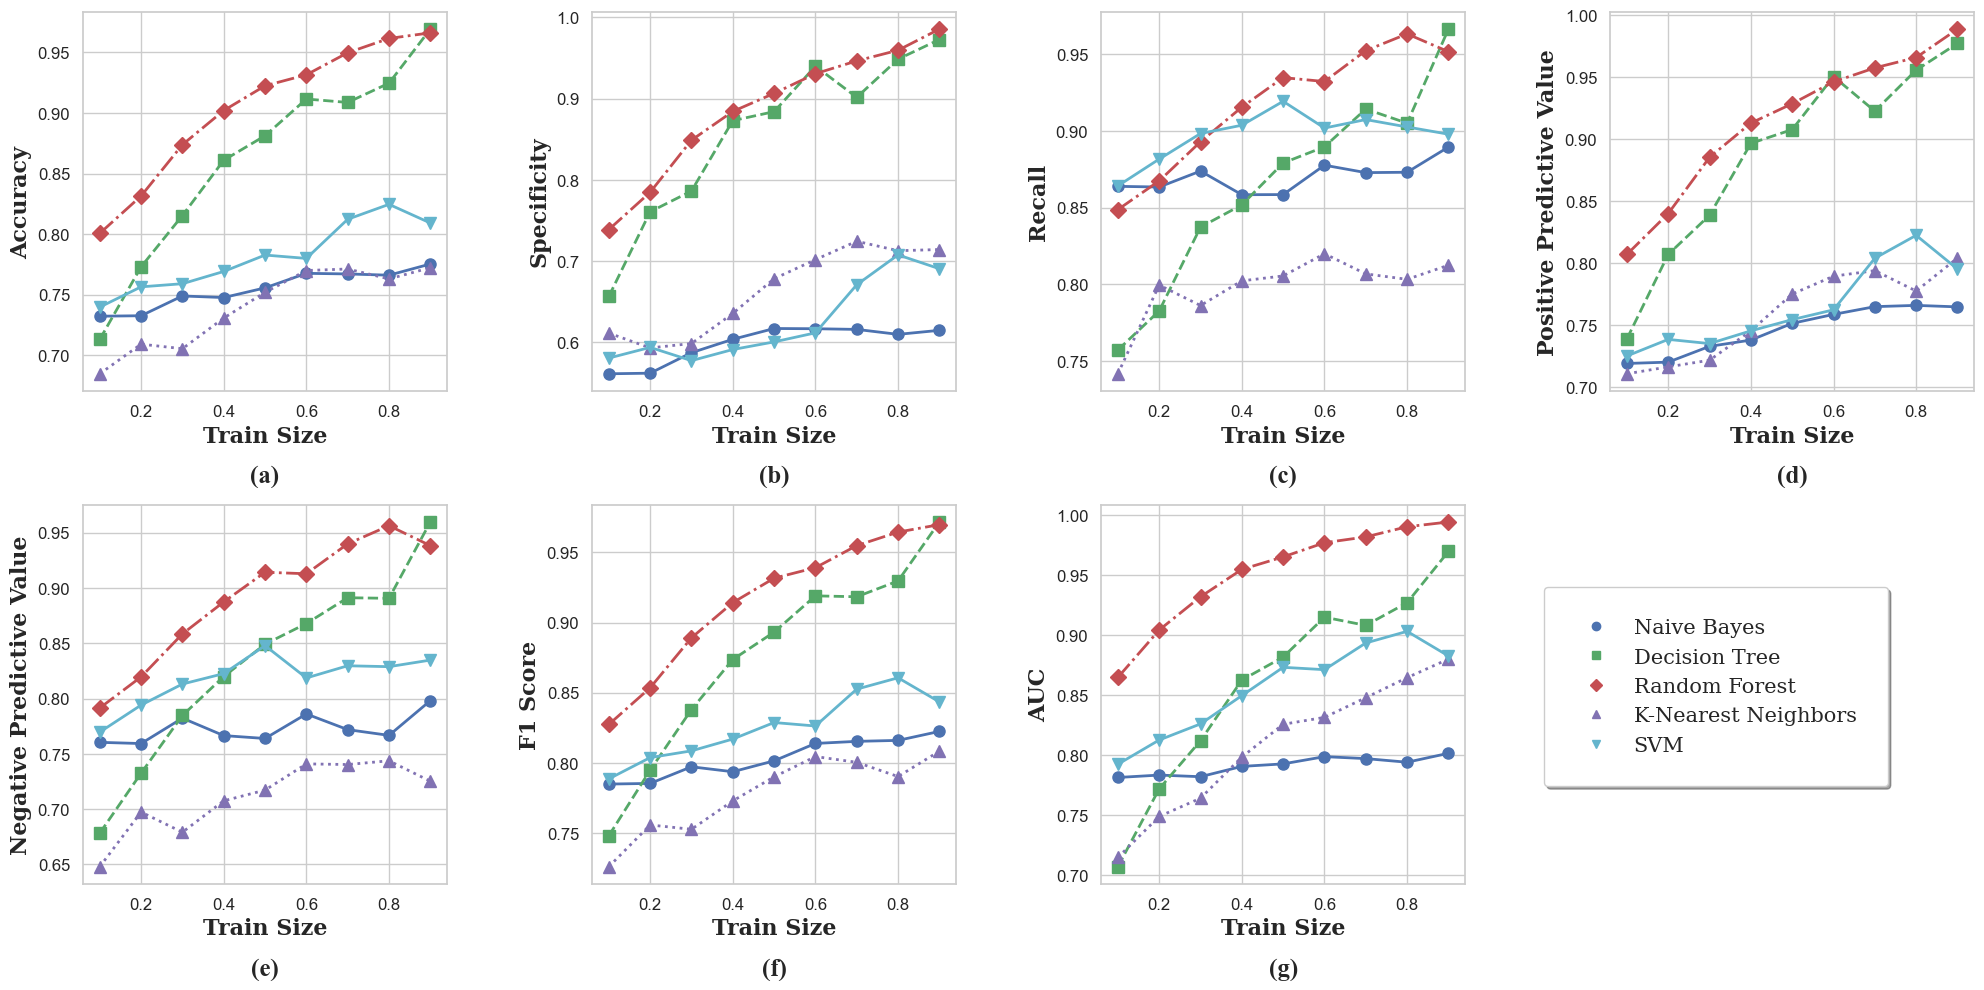

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for 2x4 layout
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].text(0.5, -0.24, '(a)', transform=axes[0, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].text(0.5, -0.24, '(b)', transform=axes[0, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].text(0.5, -0.24, '(c)', transform=axes[0, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[0, 3].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 3].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].set_ylabel('Positive Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].text(0.5, -0.24, '(d)', transform=axes[0, 3].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 0].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Negative Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].text(0.5, -0.24, '(e)', transform=axes[1, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 1].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('F1 Score', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].text(0.5, -0.24, '(f)', transform=axes[1, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[1, 2].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('AUC', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].text(0.5, -0.24, '(g)', transform=axes[1, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Hide the last unused subplot
axes[1, 3].axis('off')

# Create a dummy plot for the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(0.96, 0.1), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 15, 'family': 'serif'})
dummy_plot.axis('off')

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('Images/11_SP_ml_classifier_metrics_2x4.png', transparent=True)
plt.show()

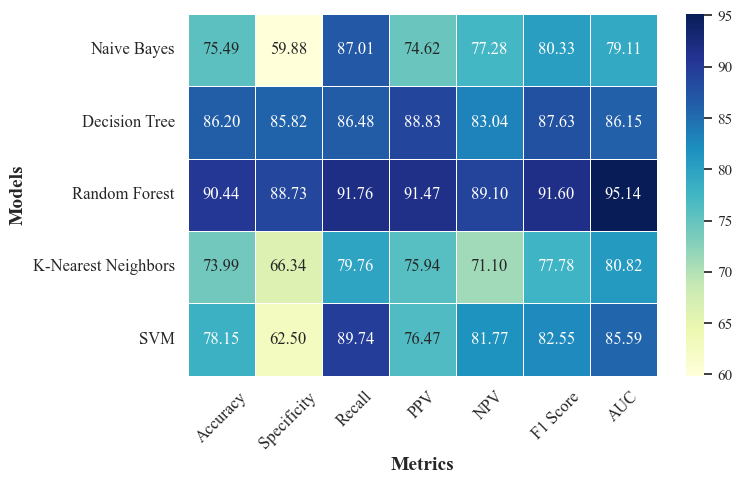

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Times New Roman as the default font
plt.rcParams.update({"font.family": "Times New Roman"})

# Example performance metrics
models = ["Naive Bayes", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "SVM"]

# Replace these lists with your actual performance metrics
data = {
    "Accuracy": [
        sum(accuracies_nb) * 100 / 9,
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
        sum(accuracies_knn) * 100 / 9,
        sum(accuracies_svm) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_nb) * 100 / 9,
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
        sum(specificities_knn) * 100 / 9,
        sum(specificities_svm) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_nb) * 100 / 9,
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
        sum(recalls_knn) * 100 / 9,
        sum(recalls_svm) * 100 / 9,
    ],
    "PPV": [
        sum(positive_predictive_values_nb) * 100 / 9,
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
        sum(positive_predictive_values_knn) * 100 / 9,
        sum(positive_predictive_values_svm) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_nb) * 100 / 9,
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
        sum(npvs_knn) * 100 / 9,
        sum(npvs_svm) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_nb) * 100 / 9,
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
        sum(f1_scores_knn) * 100 / 9,
        sum(f1_scores_svm) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_nb) * 100 / 9,
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
        sum(aucs_knn) * 100 / 9,
        sum(aucs_svm) * 100 / 9,
    ],
}

# Create a DataFrame
performance_df = pd.DataFrame(data, index=models)

# Round values to 2 decimal places
performance_df = performance_df.round(2)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    performance_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5
)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Models", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("Images/11_SP_ml_model_performance_heatmap_with_ppv_npv.png", transparent=True)
plt.show()


In [12]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) * 100 / 9)
print('dtc: ', sum(accuracies_dtc) * 100 / 9)
print('rf: ', sum(accuracies_rf) * 100 / 9)
print('knn: ', sum(accuracies_knn) * 100 / 9)
print('svm: ', sum(accuracies_svm) * 100 / 9)

Average Accuracy: 
nb:  75.4867317867318
dtc:  86.19981006647673
rf:  90.4395061728395
knn:  73.98830552163885
svm:  78.15158051824719


In [13]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) * 100 / 9)
print('dtc: ', sum(specificities_dtc) * 100 / 9)
print('rf: ', sum(specificities_rf) * 100 / 9)
print('knn: ', sum(specificities_knn) * 100 / 9)
print('svm: ', sum(specificities_svm) * 100 / 9)

Average Specificity: 
nb:  59.87667101161853
dtc:  85.81665761091496
rf:  88.73021415727193
knn:  66.3385460916531
svm:  62.496863000830984


In [14]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) * 100 / 9)
print('dtc: ', sum(recalls_dtc) * 100 / 9)
print('rf: ', sum(recalls_rf) * 100 / 9)
print('knn: ', sum(recalls_knn) * 100 / 9)
print('svm: ', sum(recalls_svm) * 100 / 9)

Average Recall: 
nb:  87.01265961255163
dtc:  86.48274023501605
rf:  91.76130567534354
knn:  79.75776338522714
svm:  89.74132179960327


In [15]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) * 100 / 9)
print('dtc: ', sum(positive_predictive_values_dtc) * 100 / 9)
print('rf: ', sum(positive_predictive_values_rf) * 100 / 9)
print('knn: ', sum(positive_predictive_values_knn) * 100 / 9)
print('svm: ', sum(positive_predictive_values_svm) * 100 / 9)

Average PPV: 
nb:  74.61598550643625
dtc:  88.83497958091597
rf:  91.47437227274737
knn:  75.93532097189662
svm:  76.47054528152351


In [16]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) * 100 / 9)
print('dtc: ', sum(npvs_dtc) * 100 / 9)
print('rf: ', sum(npvs_rf) * 100 / 9)
print('knn: ', sum(npvs_knn) * 100 / 9)
print('svm: ', sum(npvs_svm) * 100 / 9)

Average NPV: 
nb:  77.27687887107686
dtc:  83.04396531489854
rf:  89.09798844151487
knn:  71.09864742360588
svm:  81.76834458792922


In [17]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) * 100 / 9)
print('dtc: ', sum(f1_scores_dtc) * 100 / 9)
print('rf: ', sum(f1_scores_rf) * 100 / 9)
print('knn: ', sum(f1_scores_knn) * 100 / 9)
print('svm: ', sum(f1_scores_svm) * 100 / 9)

Average F1-Score: 
nb:  80.33090138972247
dtc:  87.62715561099316
rf:  91.60460285326937
knn:  77.78077015664684
svm:  82.54778690022391


In [18]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) * 100 / 9)
print('dtc: ', sum(aucs_dtc) * 100 / 9)
print('rf: ', sum(aucs_rf) * 100 / 9)
print('knn: ', sum(aucs_knn) * 100 / 9)
print('svm: ', sum(aucs_svm) * 100 / 9)

Average AUC: 
nb:  79.11202180250935
dtc:  86.14969892296551
rf:  95.1409213329206
knn:  80.82480580199007
svm:  85.58559247491746
